In [78]:
import numpy as np
from matplotlib import pyplot as plt
import random
import math
import scipy.special as sc

In [79]:
def total_prob(P_H, PA_H):
    prob_aprior_Hyp = np.array(P_H)
    aprior_Prob_Event_A = np.array(PA_H)
    P_A = sum(prob_aprior_Hyp * aprior_Prob_Event_A)
    prob_aposterior_Hyp = prob_aprior_Hyp * aprior_Prob_Event_A / P_A
    return prob_aprior_Hyp, prob_aposterior_Hyp, aprior_Prob_Event_A, P_A

In [80]:
def plot_total_prob3(P_H,PA_H):
    print('Априорные вероятности гипотез:')
    print('P(H1)=',total_prob(P_H, PA_H)[0][0])
    print('P(H2)=',total_prob(P_H, PA_H)[0][1])
    print('P(H3)=',total_prob(P_H, PA_H)[0][2])
    print('Контроль: сумма всех P(Hk)=:', sum(total_prob(P_H, PA_H)[0]))
    print ('P(A)=:', total_prob(P_H, PA_H)[3])
    print('P(H1|A)=', total_prob(P_H, PA_H)[1][0])
    print('P(H2|A)=', total_prob(P_H, PA_H)[1][1])
    print('P(H3|A)=', total_prob(P_H, PA_H)[1][2])
    print('Контроль: сумма всех P(Hk|A)=:', sum(total_prob(P_H, PA_H)[1]))
    index = np.arange(3)
    bw = 0.4
    plt.title('Априорные и апостериорные вероятности гипотез')
    plt.bar(index, total_prob(P_H, PA_H)[0], bw, color='r',label='априорные вероятности гипотез')
    plt.bar(index+bw, total_prob(P_H, PA_H)[1], bw, color='b',label='апостериорные вероятности гипотез')
    plt.ylabel("Вероятность")
    plt.xticks(index+0.5*bw,['Гипотеза H1','Гипотеза H2', 'Гипотеза H3'])
    plt.legend(loc="upper right")
    plt.show()

In [81]:
def plot_total_prob3(P_H,PA_H):
    print('Априорные вероятности гипотез:')
    print('P(H1)=',total_prob(P_H, PA_H)[0][0])
    print('P(H2)=',total_prob(P_H, PA_H)[0][1])
    print('P(H3)=',total_prob(P_H, PA_H)[0][2])
    print('Контроль: сумма всех P(Hk)=:', sum(total_prob(P_H, PA_H)[0]))
    print ('P(A)=:', total_prob(P_H, PA_H)[3])
    print('P(H1|A)=', total_prob(P_H, PA_H)[1][0])
    print('P(H2|A)=', total_prob(P_H, PA_H)[1][1])
    print('P(H3|A)=', total_prob(P_H, PA_H)[1][2])
    print('Контроль: сумма всех P(Hk|A)=:', sum(total_prob(P_H, PA_H)[1]))
    index = np.arange(3)
    bw = 0.4
    plt.title('Априорные и апостериорные вероятности гипотез')
    plt.bar(index, total_prob(P_H, PA_H)[0], bw, color='r',label='априорные вероятности гипотез')
    plt.bar(index+bw, total_prob(P_H, PA_H)[1], bw, color='b',label='апостериорные вероятности гипотез')
    plt.ylabel("Вероятность")
    plt.xticks(index+0.5*bw,['Гипотеза H1','Гипотеза H2', 'Гипотеза H3'])
    plt.legend(loc="upper right")
    plt.show()

In [82]:
def plot_total_prob2(P_H,PA_H):
    print('Априорные вероятности гипотез:')
    print('P(H1)=',total_prob(P_H, PA_H)[0][0])
    print('P(H2)=',total_prob(P_H, PA_H)[0][1])
    print('Контроль: сумма всех P(Hk)=:', sum(total_prob(P_H, PA_H)[0]))
    print ('P(A)=:', total_prob(P_H, PA_H)[3])
    print('P(H1|A)=', total_prob(P_H, PA_H)[1][0])
    print('P(H2|A)=', total_prob(P_H, PA_H)[1][1])
    print('Контроль: сумма всех P(Hk|A)=:', sum(total_prob(P_H, PA_H)[1]))
    index = np.arange(2)
    bw = 0.4
    plt.title('Априорные и апостериорные вероятности гипотез')
    plt.bar(index, total_prob(P_H, PA_H)[0], bw, color='r',label='априорные вероятности гипотез')
    plt.bar(index+bw, total_prob(P_H, PA_H)[1], bw, color='b',label='апостериорные вероятности гипотез')
    plt.ylabel("Вероятность")
    plt.xticks(index+0.5*bw,['Гипотеза H1','Гипотеза H2'])
    plt.legend(loc="upper right")
    plt.show()

In [83]:
def stat_prob3(N):
    Hypotheses = ['H1', 'H2', 'H3']
    # Генерируем N событий на уровне какая из гипотез наступила
    Hypotheses_N = np.random.choice(Hypotheses,N,p=total_prob(P_H, PA_H)[0])
    x=[True,False]
    A=np.repeat(False,N) # Вводим первоначальные наступления успехов
    p1=[total_prob(P_H, PA_H)[2][0],1-total_prob(P_H, PA_H)[2][0]]
    p2=[total_prob(P_H, PA_H)[2][1],1-total_prob(P_H, PA_H)[2][1]]
    p3=[total_prob(P_H, PA_H)[2][2],1-total_prob(P_H, PA_H)[2][2]]
    for i in range(N):
        if Hypotheses_N[i]=='H1':
            A[i]=np.random.choice(x,1, p=p1)
        elif Hypotheses_N[i]=='H2':
            A[i]=np.random.choice(x,1, p=p2)
        elif Hypotheses_N[i]=='H3':
            A[i]=np.random.choice(x,1, p=p3)
    M=len(A[A==True])
    # Определяем когда наступал успех с гипотезой «Н2»
    AH2=np.repeat(False,N)
    for i in range(N):
        if (Hypotheses_N[i]=='H2' and A[i]==True):
            AH2[i]=True
        else:
            AH2[i]=False
    M2=len(AH2[AH2==True])
    
    return M/N, M2/N

In [123]:
def stat_prob3_2(N):
    Hypotheses = ['H1', 'H2', 'H3']
    # Генерируем N событий на уровне какая из гипотез наступила
    Hypotheses_N = np.random.choice(Hypotheses,N,p=total_prob(P_H, PA_H)[0])
    x=[True,False]
    A=np.repeat(False,N) # Вводим первоначальные наступления успехов
    p1=[total_prob(P_H, PA_H)[2][0],1-total_prob(P_H, PA_H)[2][0]]
    p2=[total_prob(P_H, PA_H)[2][1],1-total_prob(P_H, PA_H)[2][1]]
    p3=[total_prob(P_H, PA_H)[2][2],1-total_prob(P_H, PA_H)[2][2]]
    for i in range(N):
        if Hypotheses_N[i]=='H1':
            A[i]=np.random.choice(x,1, p=p1)
        elif Hypotheses_N[i]=='H2':
            A[i]=np.random.choice(x,1, p=p2)
        elif Hypotheses_N[i]=='H3':
            A[i]=np.random.choice(x,1, p=p3)
    M=len(A[A==True])
    # Определяем когда наступал успех с гипотезой «Н2»
    AH1=np.repeat(False,N)
    for i in range(N):
        if (Hypotheses_N[i]=='H1' and A[i]==True):
            AH1[i]=True
        else:
            AH1[i]=False
    M1=len(AH1[AH1==True])
    
    AH2=np.repeat(False,N)
    for i in range(N):
        if (Hypotheses_N[i]=='H2' and A[i]==True):
            AH2[i]=True
        else:
            AH2[i]=False
    M2=len(AH2[AH2==True])
    
    AH3=np.repeat(False,N)
    for i in range(N):
        if (Hypotheses_N[i]=='H3' and A[i]==True):
            AH3[i]=True
        else:
            AH3[i]=False
    M3=len(AH3[AH3==True])
    return M/N, M1/N, M2/N, M3/N

In [125]:
def stat_prob3_3(N):
    Hypotheses = ['H1', 'H2', 'H3']
    # Генерируем N событий на уровне какая из гипотез наступила
    Hypotheses_N = np.random.choice(Hypotheses,N,p=total_prob(P_H, PA_H)[0])
    x=[True,False]
    A=np.repeat(False,N) # Вводим первоначальные наступления успехов
    p1=[total_prob(P_H, PA_H)[2][0],1-total_prob(P_H, PA_H)[2][0]]
    p2=[total_prob(P_H, PA_H)[2][1],1-total_prob(P_H, PA_H)[2][1]]
    p3=[total_prob(P_H, PA_H)[2][2],1-total_prob(P_H, PA_H)[2][2]]
    for i in range(N):
        if Hypotheses_N[i]=='H1':
            A[i]=np.random.choice(x,1, p=p1)
        elif Hypotheses_N[i]=='H2':
            A[i]=np.random.choice(x,1, p=p2)
        elif Hypotheses_N[i]=='H3':
            A[i]=np.random.choice(x,1, p=p3)
    M=len(A[A==True])
    # Определяем когда наступал успех с гипотезой «Н2»
    AH3=np.repeat(False,N)
    for i in range(N):
        if (Hypotheses_N[i]=='H3' and A[i]==True):
            AH3[i]=True
        else:
            AH3[i]=False
    M3=len(AH3[AH3==True])
    
    return M/N, M3/N

In [85]:
def stat_prob2(N):
    Hypotheses = ['H1', 'H2']
    # Генерируем N событий на уровне какая из гипотез наступила
    Hypotheses_N = np.random.choice(Hypotheses,N,p=total_prob(P_H, PA_H)[0])
    x=[True,False]
    A=np.repeat(False,N) # Вводим первоначальные наступления успехов
    p1=[total_prob(P_H, PA_H)[2][0],1-total_prob(P_H, PA_H)[2][0]]
    p2=[total_prob(P_H, PA_H)[2][1],1-total_prob(P_H, PA_H)[2][1]]
    for i in range(N):
        if Hypotheses_N[i]=='H1':
            A[i]=np.random.choice(x,1, p=p1)
        elif Hypotheses_N[i]=='H2':
            A[i]=np.random.choice(x,1, p=p2)
    M=len(A[A==True])

    return M/N

In [86]:
def plot_stat_prob3(N):
    x = range(1, N + 1)
    y = [stat_prob3(num)[0] for num in x]
    plt.plot(x, y, color='r')
    plt.title('Статистическая вероятность')
    plt.xlabel('Количество испытаний')
    plt.ylabel('Вероятность')
    plt.ylim(0, 1)  # Значения в пределах [0,1]
    plt.xlim(0, N)
    plt.plot(x,[total_prob(P_H, PA_H)[3]]*len(x),color='b')
    plt.grid(True)
    plt.show()

In [87]:
def plot_stat_prob2(N):
    x = range(1, N + 1)
    y = [stat_prob2(num) for num in x]
    plt.plot(x, y, color='r')
    plt.title('Статистическая вероятность')
    plt.xlabel('Количество испытаний')
    plt.ylabel('Вероятность')
    plt.ylim(0, 1)  # Значения в пределах [0,1]
    plt.xlim(0, N)
    plt.plot(x,[total_prob(P_H, PA_H)[3]]*len(x),color='b')
    plt.grid(True)
    plt.show()

1. В ящике содержатся 5 деталей, изготовленных на первом заводе, 6 деталей
– на втором заводе и 8 деталей – на третьем заводе. Вероятности изготовления
брака на заводах с номерами 1, 2 и 3 соответственно равны 0.02, 0.01 и 0.03.
Найдите вероятность того, что извлеченная наудачу деталь окажется
качественной. Какова при этом вероятность, что эту качественную деталь
изготовил второй завод?

In [88]:
n1 = 5
n2 = 6
n3 = 8
n = n1 + n2 + n3
P_H = [n1/n, n2/n, n3/n]
PA_H1 = 1 - 0.02
PA_H2 = 1 - 0.01
PA_H3 = 1 - 0.03
PA_H = [PA_H1, PA_H2, PA_H3]

In [89]:
total_prob(P_H, PA_H)

(array([0.26315789, 0.31578947, 0.42105263]),
 array([0.26344086, 0.31935484, 0.4172043 ]),
 array([0.98, 0.99, 0.97]),
 0.9789473684210526)

Априорные вероятности гипотез:
P(H1)= 0.2631578947368421
P(H2)= 0.3157894736842105
P(H3)= 0.42105263157894735
Контроль: сумма всех P(Hk)=: 1.0
P(A)=: 0.9789473684210526
P(H1|A)= 0.26344086021505375
P(H2|A)= 0.31935483870967746
P(H3|A)= 0.4172043010752688
Контроль: сумма всех P(Hk|A)=: 1.0


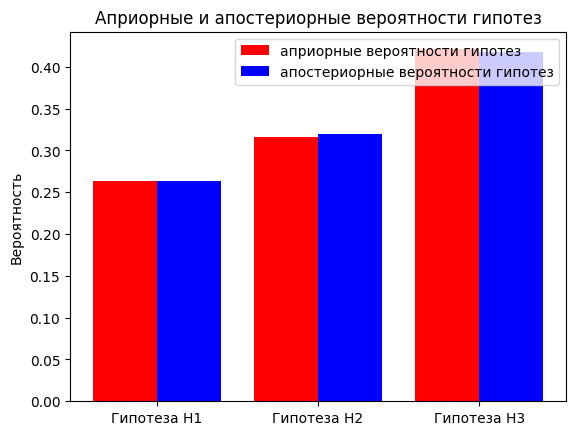

In [90]:
plot_total_prob3(P_H, PA_H)

In [91]:
stat_prob3(1000)

(0.975, 0.296)

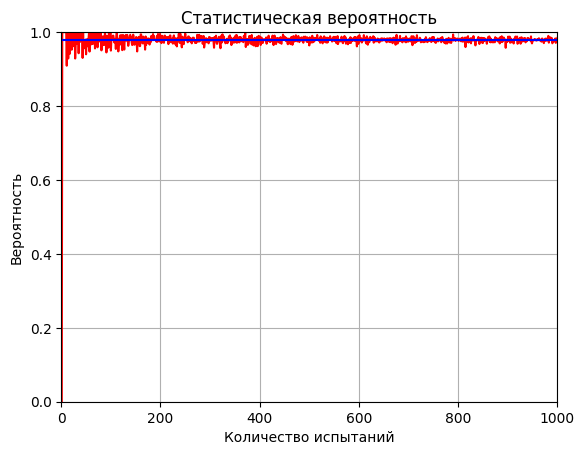

In [92]:
plot_stat_prob3(1000)

2. В консалтинговом агентстве работает 12 сотрудников высшей
категории, 25 сотрудников – перовой категории и 16 сотрудников – второй
категории. Вероятности ошибочных заключений, выданных сотрудниками
агентства, зависят от их квалификации и равны: 0.02– для высшей категории,
0.08 – для первой категории и 0.15 – для второй соответственно. Найдите
вероятность того, что при обращении в данное агентство к случайно
выбранному сотруднику клиенту будет выдано верное заключение. К какому
из типов сотрудников вероятнее всего попал данный клиент?

In [116]:
n1 = 12
n2 = 25
n3 = 16
n = n1 + n2 + n3
P_H = [n1/n, n2/n, n3/n]
PA_H1 = 1 - 0.02
PA_H2 = 1 - 0.08
PA_H3 = 1 - 0.15
PA_H = [PA_H1, PA_H2, PA_H3]

In [117]:
total_prob(P_H, PA_H)

(array([0.22641509, 0.47169811, 0.30188679]),
 array([0.24317618, 0.47559967, 0.28122415]),
 array([0.98, 0.92, 0.85]),
 0.9124528301886792)

Априорные вероятности гипотез:
P(H1)= 0.22641509433962265
P(H2)= 0.4716981132075472
P(H3)= 0.3018867924528302
Контроль: сумма всех P(Hk)=: 1.0
P(A)=: 0.9124528301886792
P(H1|A)= 0.24317617866004965
P(H2|A)= 0.4755996691480563
P(H3|A)= 0.28122415219189417
Контроль: сумма всех P(Hk|A)=: 1.0


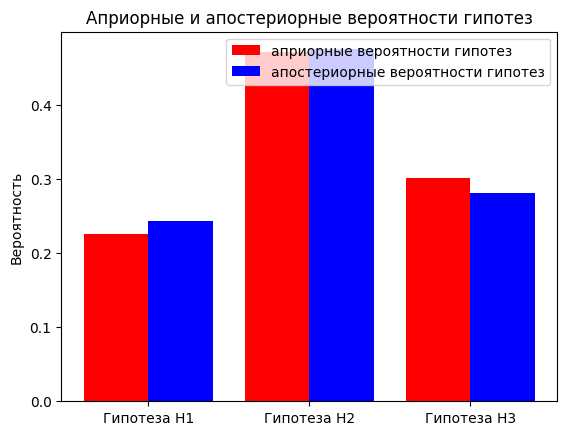

In [118]:
plot_total_prob3(P_H, PA_H)

In [124]:
stat_prob3_2(1000) # => человек попадёт с большей вероятностью к оператору №2

(0.914, 0.221, 0.444, 0.249)

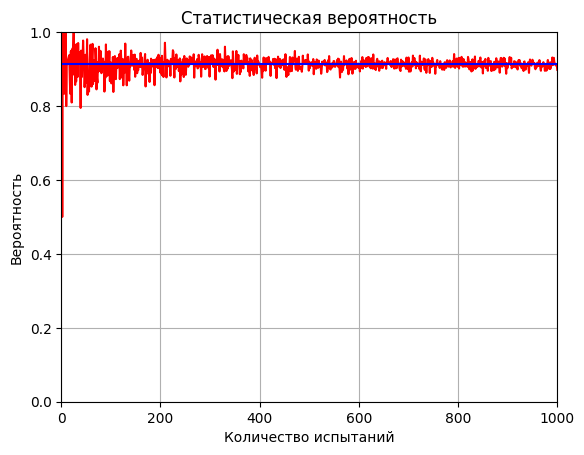

In [97]:
plot_stat_prob3(1000)

3. Предложение инвестору содержит 15 контрактов типа A, 11 контрактов
типа B и 9 контрактов типа С. Вероятность того, что контракт принесет убыток
равна 0.23 – для типа А, 0.19 – для типа В и 0.21 – для типа С. Найдите вероятность
того, что случайно выбранный инвестором контракт окажется убыточным.
Какова при этом вероятность того, что это оказался контракт типа C.

In [132]:
n1 = 15
n2 = 11
n3 = 9
n = n1 + n2 + n3
P_H = [n1/n, n2/n, n3/n]
PA_H1 = 0.23
PA_H2 = 0.19
PA_H3 = 0.21
PA_H = [PA_H1, PA_H2, PA_H3]

In [133]:
total_prob(P_H, PA_H)

(array([0.42857143, 0.31428571, 0.25714286]),
 array([0.46433378, 0.28129206, 0.25437416]),
 array([0.23, 0.19, 0.21]),
 0.21228571428571427)

Априорные вероятности гипотез:
P(H1)= 0.42857142857142855
P(H2)= 0.3142857142857143
P(H3)= 0.2571428571428571
Контроль: сумма всех P(Hk)=: 1.0
P(A)=: 0.21228571428571427
P(H1|A)= 0.4643337819650068
P(H2|A)= 0.2812920592193809
P(H3|A)= 0.2543741588156124
Контроль: сумма всех P(Hk|A)=: 1.0


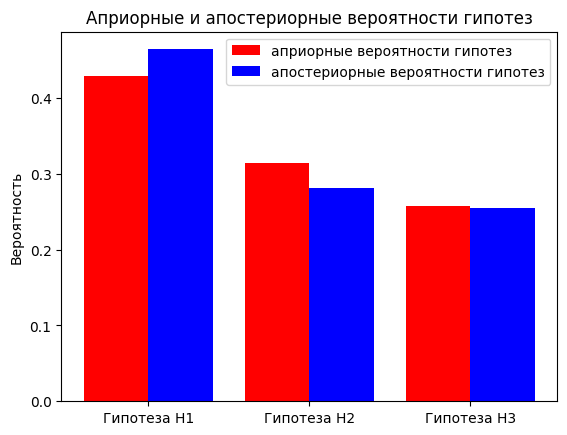

In [134]:
plot_total_prob3(P_H, PA_H)

In [135]:
stat_prob3_3(1000)

(0.205, 0.055)

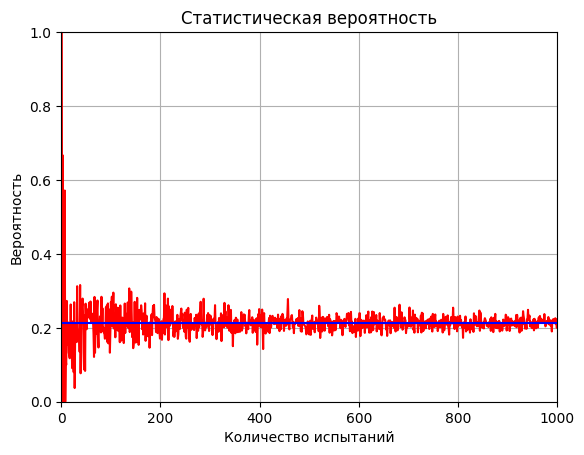

In [136]:
plot_stat_prob3(1000)

4. Аналитики страховой компании по степени ущерба различают три типа
страховых случаев (А, B, C). Вероятности их наступления равны
соответственно 0.6, 0.25 и 0.15. Вероятности того, что клиенту будет отказано
в выплате страховой премии равны 0.07 - по типу A, 0.05 - по типу B и 0.11 -
по типу С. Найдите вероятность того, что при наступлении страхового случая
страховая премия будет клиенту выплачена. Указать какой при этом тип
страхового случая произошел скорее всего.

In [142]:
P_H = [0.6, 0.25, 0.15]
PA_H1 = 1 - 0.07
PA_H2 = 1 - 0.05
PA_H3 = 1 - 0.11
PA_H = [PA_H1, PA_H2, PA_H3]

In [143]:
total_prob(P_H, PA_H)

(array([0.6 , 0.25, 0.15]),
 array([0.60064586, 0.25565124, 0.14370291]),
 array([0.93, 0.95, 0.89]),
 0.9289999999999998)

Априорные вероятности гипотез:
P(H1)= 0.6
P(H2)= 0.25
P(H3)= 0.15
Контроль: сумма всех P(Hk)=: 1.0
P(A)=: 0.9289999999999998
P(H1|A)= 0.6006458557588805
P(H2|A)= 0.25565123789020455
P(H3|A)= 0.143702906350915
Контроль: сумма всех P(Hk|A)=: 1.0


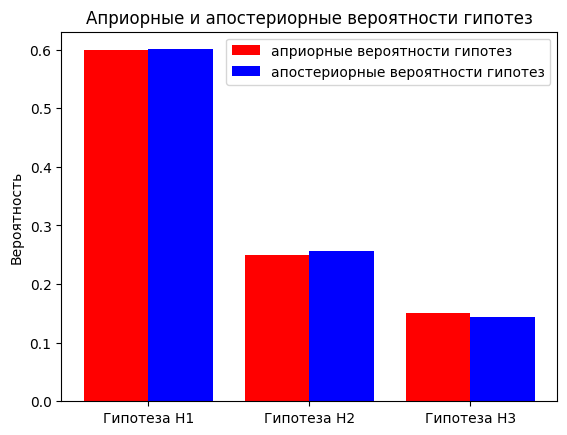

In [144]:
plot_total_prob3(P_H, PA_H)

In [145]:
stat_prob3_2(1000) # => скорее всего произошёл страховой случай 1-го типа

(0.928, 0.548, 0.252, 0.128)

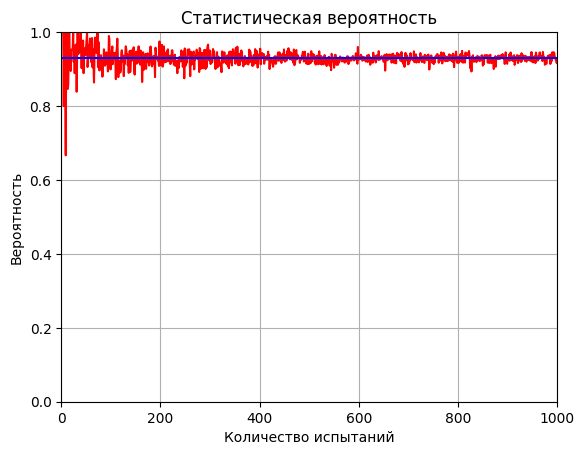

In [146]:
plot_stat_prob3(1000)

5. В ящике 4 белых и 6 черных шара. В ящик добавляют один шар 
(равновероятно белый или черный), а после этого достают два шара. Какова 
вероятность, что это окажутся два черных шара?

In [108]:
m1 = m2 = 1/2
P_H = [m1, m2]
PA_H1 = 6/11
PA_H2 = 7/11
PA_H = [PA_H1, PA_H2]

In [109]:
total_prob(P_H, PA_H)

(array([0.5, 0.5]),
 array([0.46153846, 0.53846154]),
 array([0.54545455, 0.63636364]),
 0.5909090909090908)

Априорные вероятности гипотез:
P(H1)= 0.5
P(H2)= 0.5
Контроль: сумма всех P(Hk)=: 1.0
P(A)=: 0.5909090909090908
P(H1|A)= 0.46153846153846156
P(H2|A)= 0.5384615384615385
Контроль: сумма всех P(Hk|A)=: 1.0


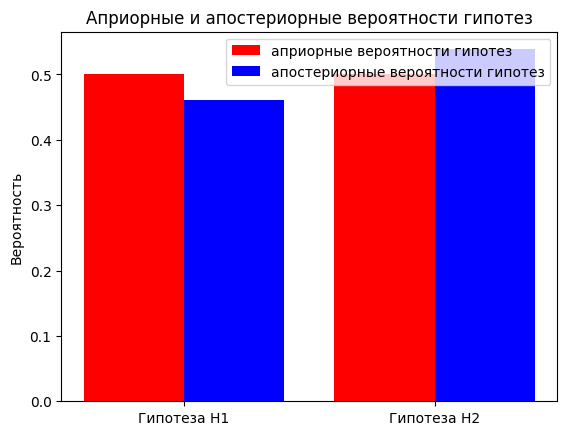

In [110]:
plot_total_prob2(P_H,PA_H)

In [111]:
stat_prob2(1000)

0.559

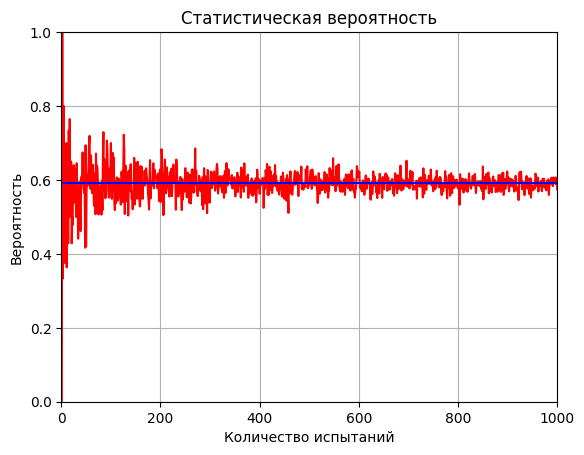

In [112]:
plot_stat_prob2(1000)